## Model Development

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### SLR

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm= LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
x = df[['highway-mpg']]
y= df['price']
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
yhat = lm.predict(x)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
lm.intercept_

38423.3058581574

In [10]:
lm.coef_

array([-821.73337832])

### MLR

In [11]:
z = df[['horsepower','highway-mpg', 'curb-weight', 'engine-size']]
lm.fit(z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
yhat = lm.predict(z)

In [13]:
lm.intercept_

-15806.624626329227

In [14]:
lm.coef_

array([53.49574423, 36.05748882,  4.70770099, 81.53026382])

## Model Evaluation Using Visualization

In [15]:
!pip install seaborn
import seaborn as sns

(0, 48288.386712799074)

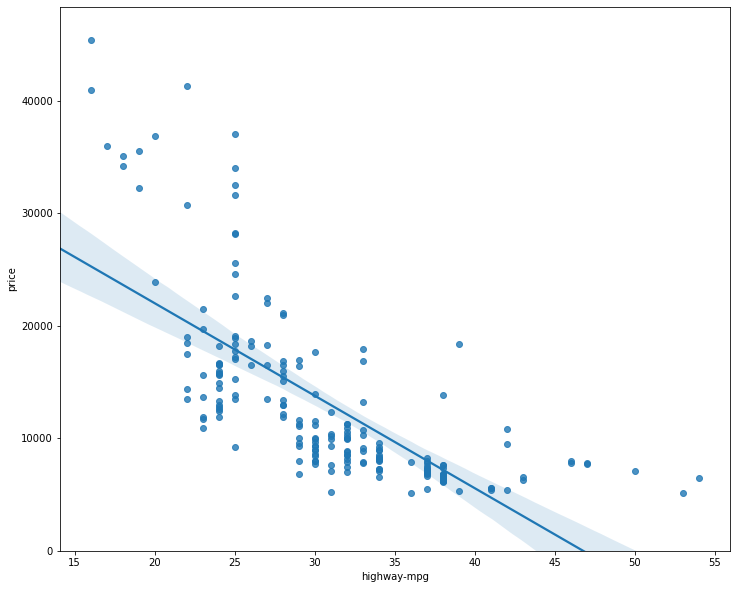

In [20]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data = df)
plt.ylim(0,)

(0, 47422.919330307624)

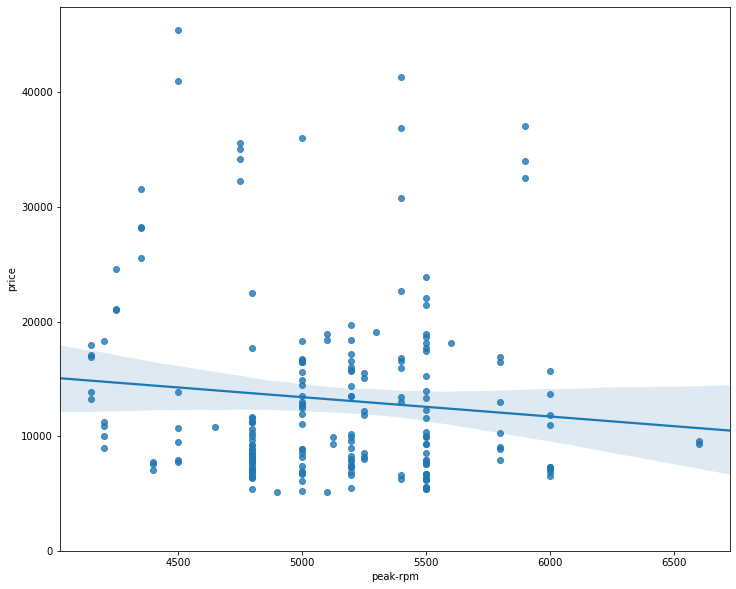

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data =df)
plt.ylim(0,)

In [24]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [26]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


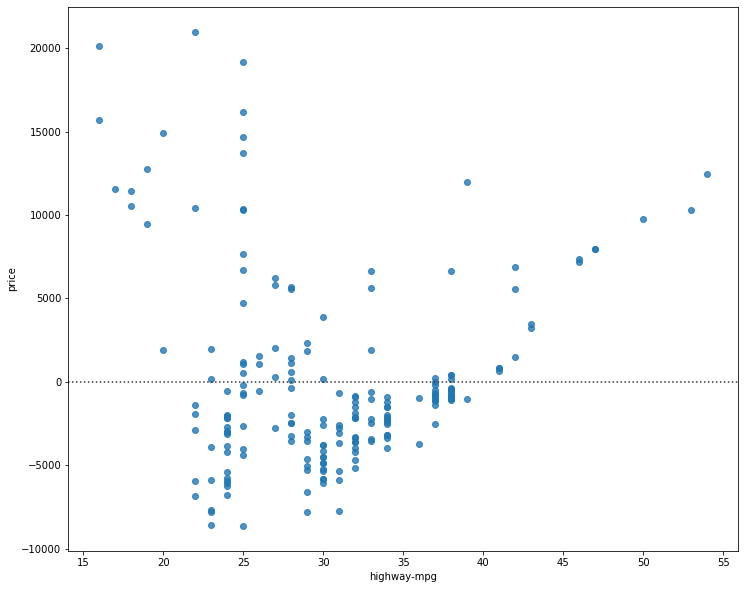

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

## Multiple Linear Regression Plot

Text(0, 0.5, 'Proportion of cars')

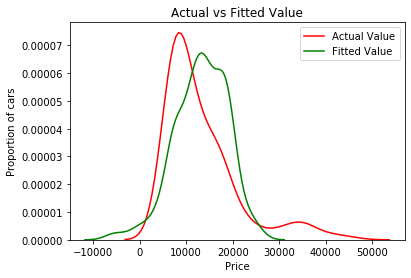

In [32]:
ax1 = sns.distplot(df['price'], hist = False , color = 'r', label = 'Actual Value')
sns.distplot(yhat, hist = False , color = 'g', label= 'Fitted Value', ax=ax1)
plt.title('Actual vs Fitted Value')
plt.xlabel('Price')
plt.ylabel('Proportion of cars')

## Ploynomial Regression & Pipeline

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [45]:
x = df['highway-mpg']
y = df['price']

In [46]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


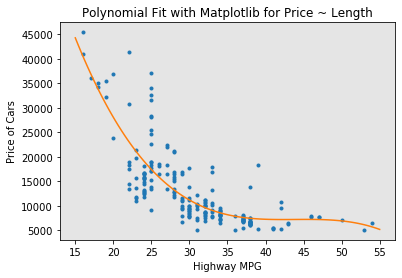

In [47]:
PlotPolly(p,x,y, 'Highway MPG')

In [48]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


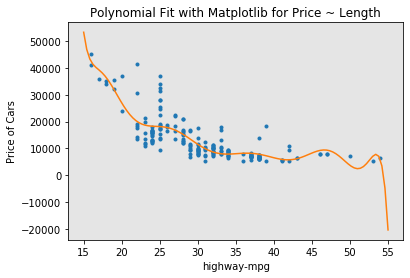

In [50]:
m= np.polyfit(x,y,11)
n = np.poly1d(m)
print(n)
PlotPolly(n,x,y,'highway-mpg')

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
pr = PolynomialFeatures(degree =2)
Zpr = pr.fit_transform(z)

In [55]:
Zpr.shape

(201, 15)

In [56]:
z.shape

(201, 4)

## Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
Input = [('Scale', StandardScaler()),('Polynomial', PolynomialFeatures(include_bias = False)), ('Model', LinearRegression())]

In [64]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('Model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [66]:
yfit = pipe.fit(z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [70]:
ypredict = pipe.predict(z)
ypredict[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## Measures for In-Sample Evaluation

### Model 1: Simple Linear Regression

In [74]:
x = df[['highway-mpg']]
y = df['price']
lm.fit(x,y)
yr2= lm.score(x,y)
print('The R-square value is:', lm.score(x,y))

The R-square value is: 0.4965911884339176


In [75]:
yhat = lm.predict(x)
print('First four predicted values are', yhat[0:4])

First four predicted values are [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [78]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat)
print('The mean squared error is:',mse)

The mean squared error is: 31635042.944639888


### Model 2: Multiple Linear Regression

In [80]:
lm.fit(z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
print('R-squared value is:',lm.score(z,y))

R-squared value is: 0.8093562806577457


In [84]:
y_predict= lm.predict(z)
print('Mean Squared Error is:', mean_squared_error(df['price'], y_predict))

Mean Squared Error is: 11980366.870726492


### Model 3: Polynomial Fit

In [85]:
from sklearn.metrics import r2_score

In [87]:
y_poly = r2_score(y, p(x))
print('R-squared Value is:', y_poly)

R-squared Value is: 0.6741946663906515


In [88]:
mean_squared_error(df['price'], p(x))

20474146.42636124

## Prediction and Decision Making

In [90]:
new_input = np.arange(1, 101,1).reshape(-1,1)

In [91]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
yhat = lm.predict(new_input)
yhat[0:4]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487])

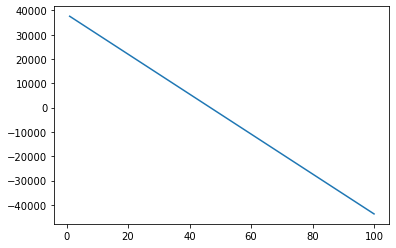

In [96]:
plt.plot(new_input, yhat)
plt.show()